In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [2]:
precincts = gpd.read_file('./Data/LAtimes2016_merged/merged_CA2016.shp')

In [4]:
votes_res = pd.read_csv('./Data/LAtimes2016_merged/all_precinct_results.csv')

C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Looking at the merged file of CA precincts

In [3]:
precincts.head()

,area,pct16,geometry
0,381364.92651,001-356210,POLYGON ((-122.2083568418432 37.78114835587201...
1,168756.59668,001-201700,POLYGON ((-122.2550451571131 37.87982148656841...
2,505296.91724,001-415000,POLYGON ((-122.1776926685124 37.75408432213523...
3,358125.63159,001-410600,"POLYGON ((-122.155066947217 37.73907890590874,..."
4,365552.78589,001-202310,POLYGON ((-122.2498928001326 37.87162883817135...


In [14]:
len(precincts)

26049

In [15]:
precincts.pct16.nunique()

24554

Oops ! It seems we have 1495 extra entries, let's have a look at them.

In [32]:
dups = precincts[precincts.duplicated('pct16', keep =False)== True]

In [66]:
dups.pct16.nunique()

690

Let's see if in the 690 repeated precincts entries, the geometries are the same (that would be the ideal case), or if they have different geometries ...

In [35]:
dups.pct16.value_counts().head(5)

085-1000    143
085-5000    125
085-4000     14
053-9559     13
085-3600     13
Name: pct16, dtype: int64

In [36]:
dups.pct16.value_counts().mean()

3.1623188405797102

(array([563.,  70.,  38.,   6.,   6.,   2.,   0.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.  ,   3.41,   4.82,   6.23,   7.64,   9.05,  10.46,  11.87,
         13.28,  14.69,  16.1 ,  17.51,  18.92,  20.33,  21.74,  23.15,
         24.56,  25.97,  27.38,  28.79,  30.2 ,  31.61,  33.02,  34.43,
         35.84,  37.25,  38.66,  40.07,  41.48,  42.89,  44.3 ,  45.71,
         47.12,  48.53,  49.94

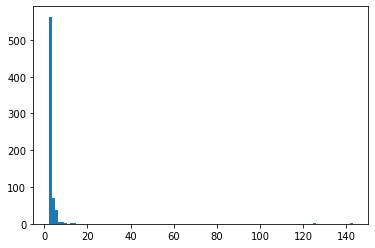

In [40]:
plt.hist(dups.pct16.value_counts(), bins=100)

Let's look at the outliers with > 100 occurrences... 

In [91]:
outlier_precinct = dups[dups['pct16'] == '085-1000']

In [92]:
outlier_precinct.head()

,area,pct16,geometry
21991,8.816577e+06,085-1000,"POLYGON ((-122.02738156875 37.43720774412401, ..."
21994,1.785699e+06,085-1000,"POLYGON ((-122.045857100567 37.46005119217016,..."
22018,2.874734e+06,085-1000,"POLYGON ((-122.02738156875 37.43720774412401, ..."
22039,2.875615e+04,085-1000,"POLYGON ((-121.9798745937861 37.4236271586447,..."
22044,2.424534e+04,085-1000,"POLYGON ((-121.9765599856168 37.4213808336537,..."


In [97]:
print(outlier_precinct['area'].max(),outlier_precinct['area'].min(), outlier_precinct['area'].mean())

15813912.77197 386.36646 428615.7192334265


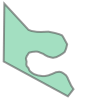

In [57]:
outlier_precinct['geometry'][21994]

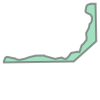

In [60]:
outlier_precinct['geometry'][22606]

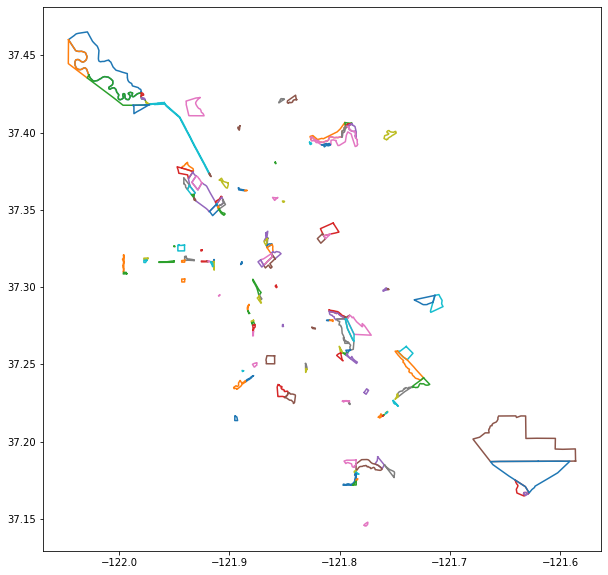

In [62]:
plt.figure(figsize = (10,10))
for index, row in outlier_precinct.iterrows():
    plt.plot(*row['geometry'].exterior.xy)

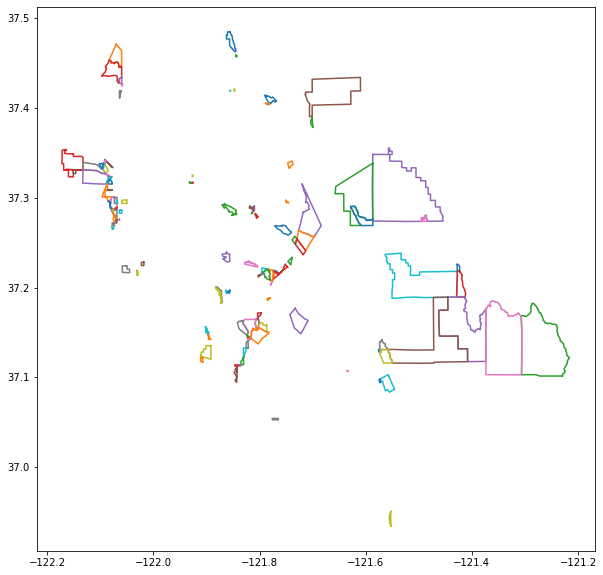

In [81]:
outlier_precinct_2 = dups[dups['pct16'] == '085-5000']
plt.figure(figsize = (10,10))
for index, row in outlier_precinct_2.iterrows():
    plt.plot(*row['geometry'].exterior.xy)

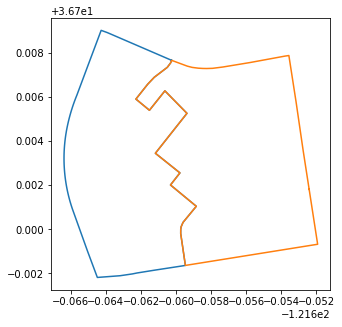

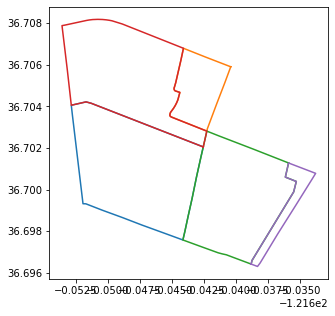

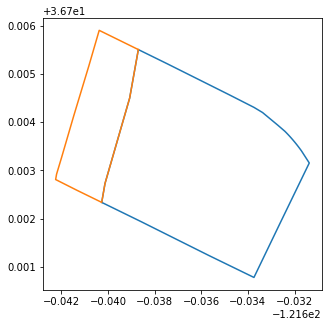

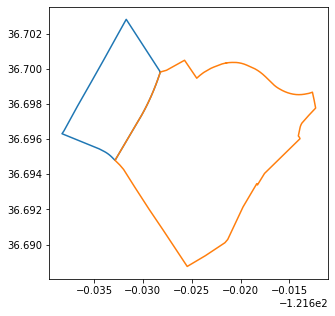

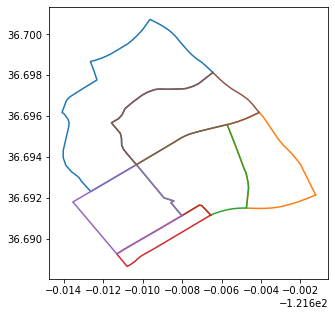

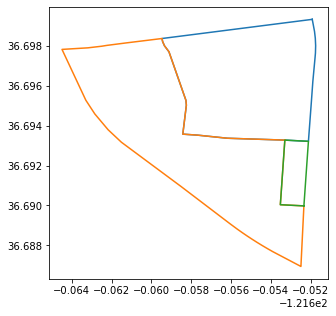

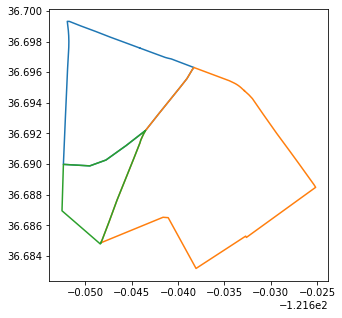

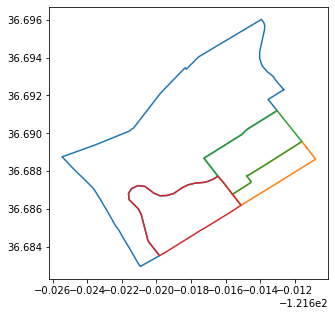

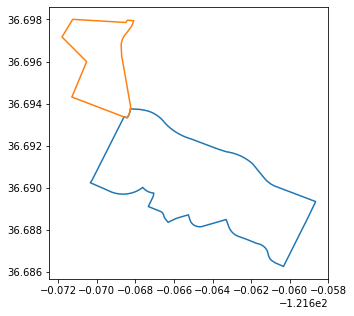

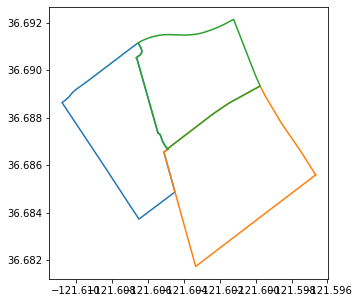

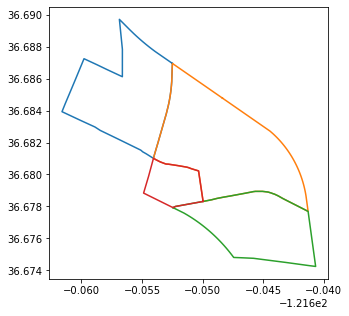

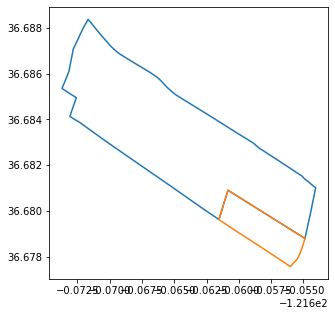

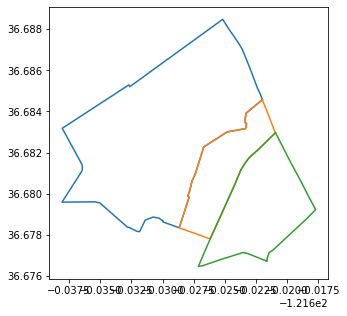

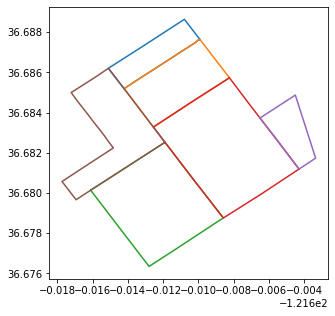

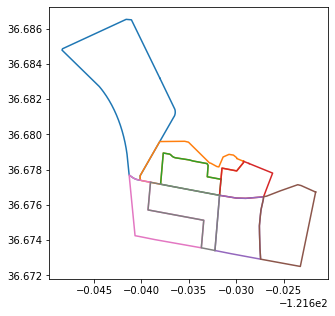

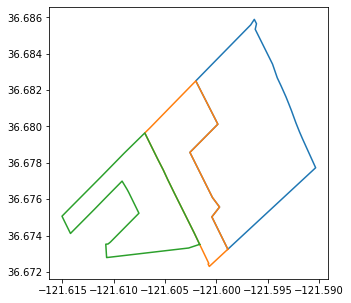

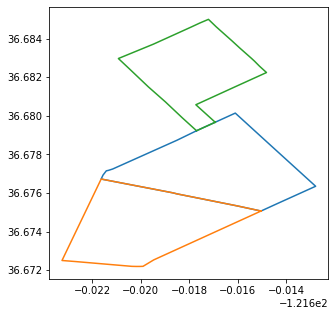

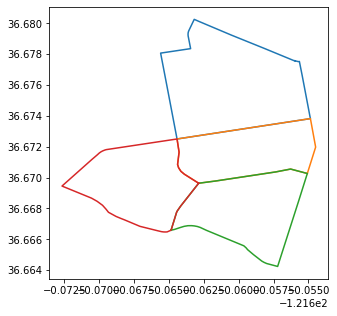

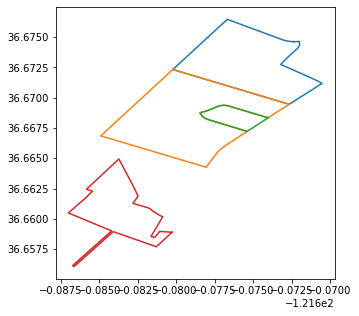

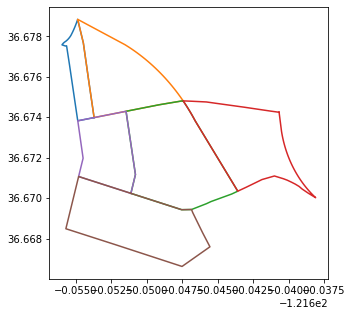

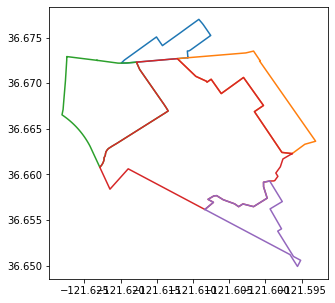

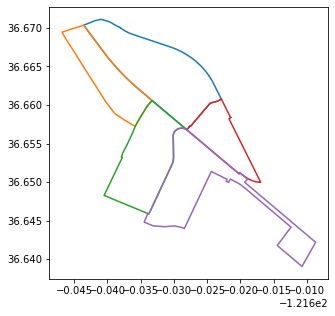

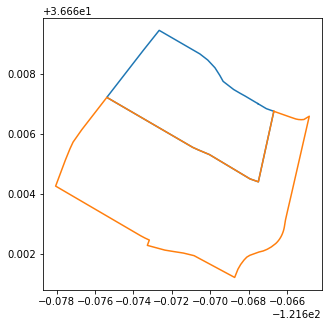

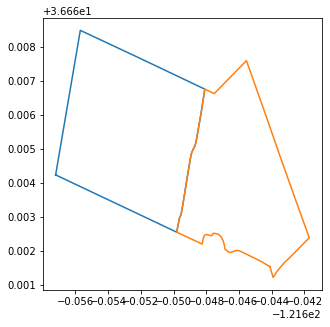

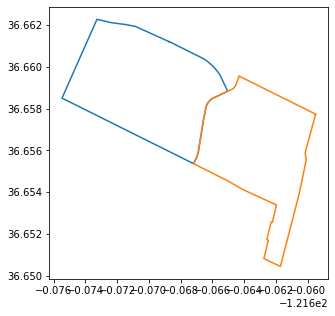

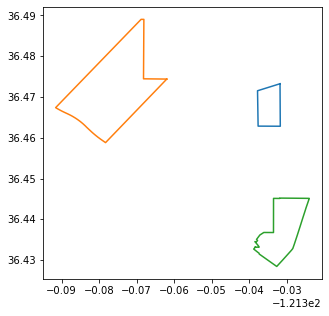

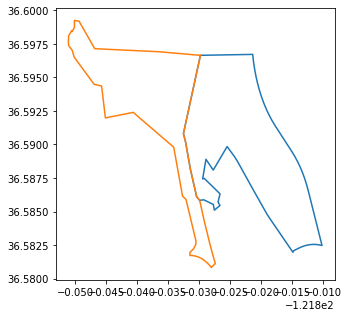

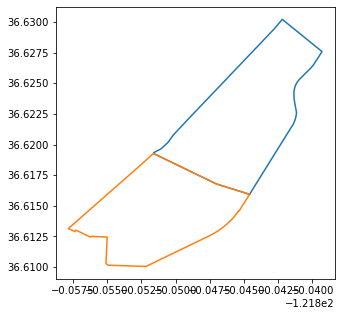

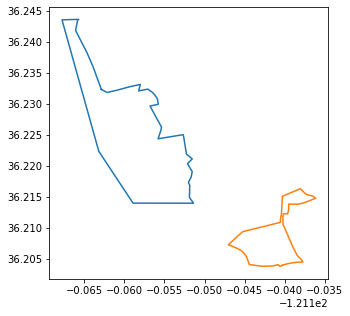

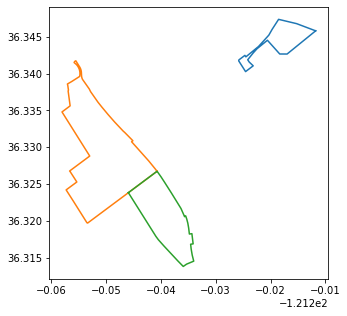

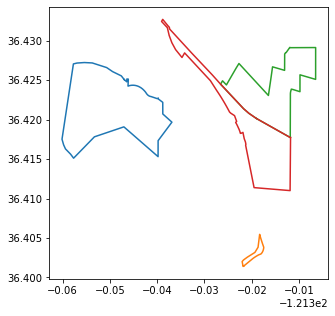

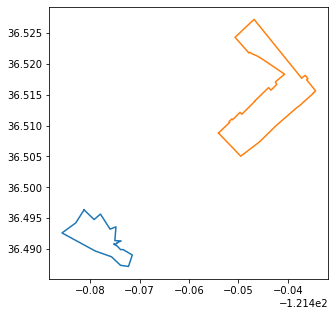

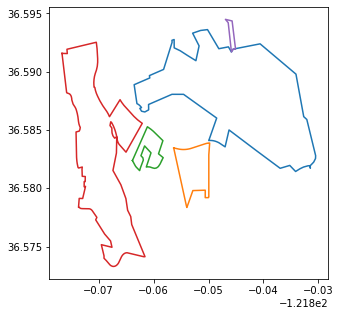

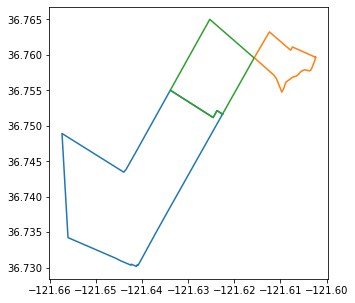

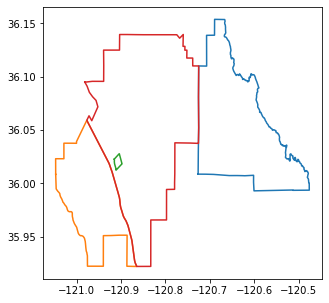

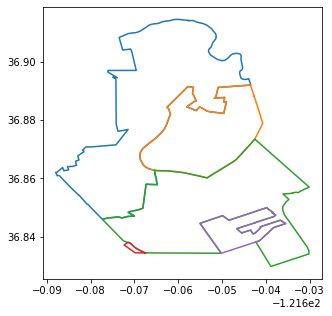

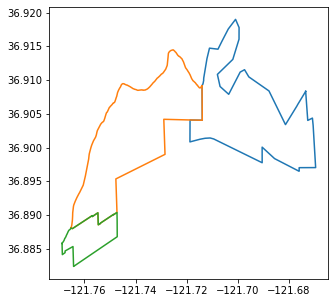

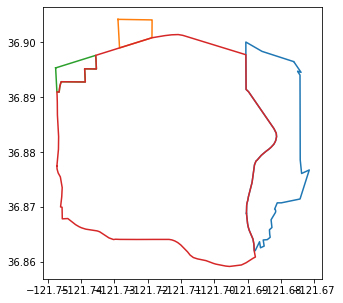

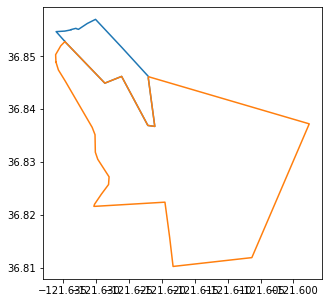

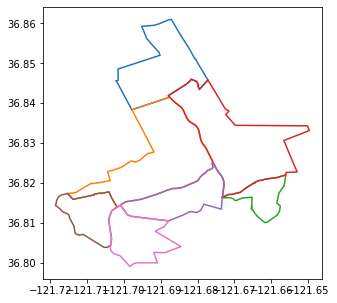

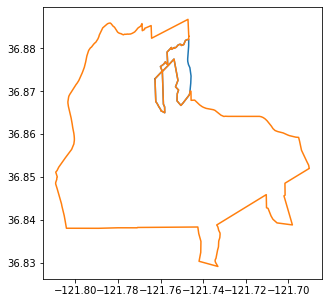

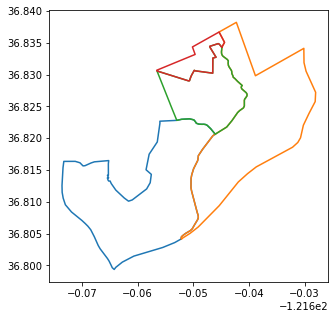

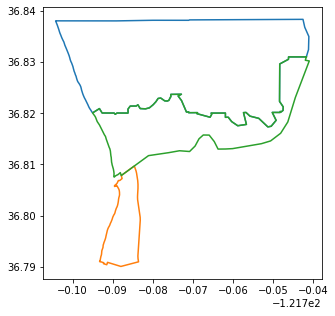

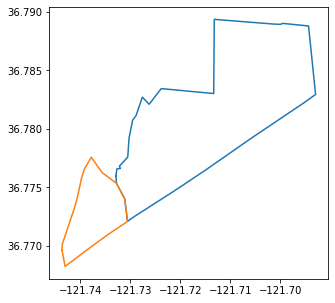

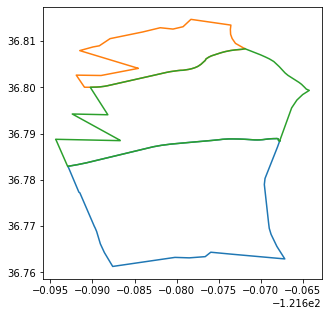

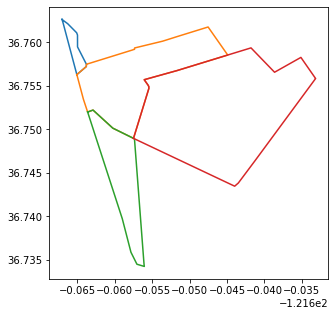

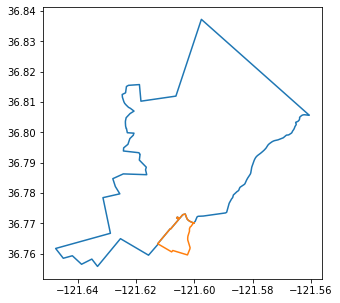

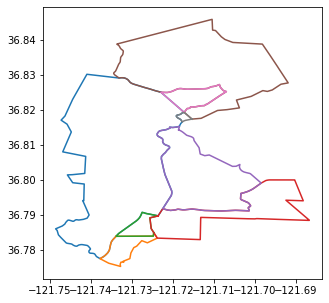

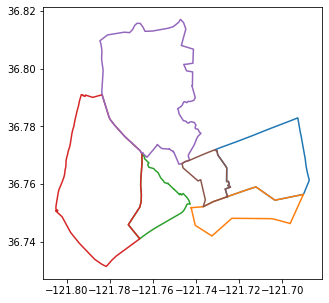

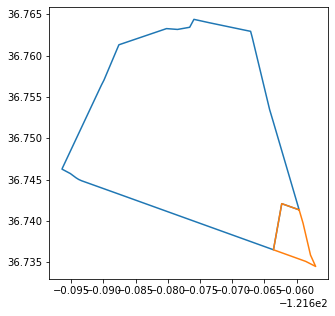

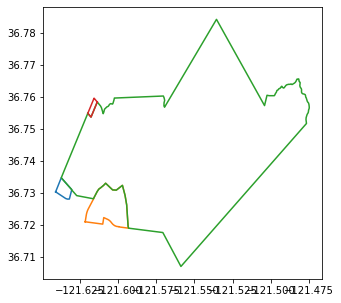

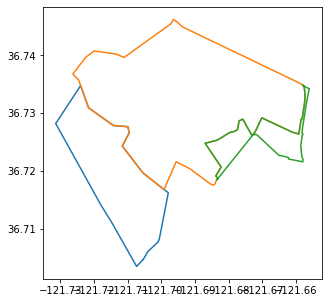

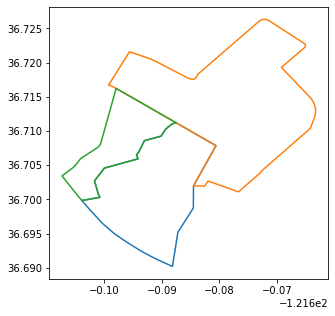

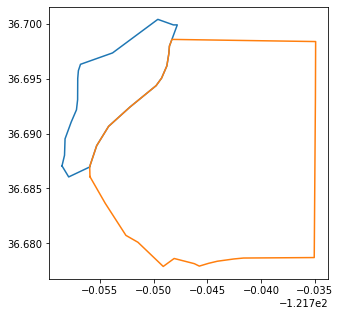

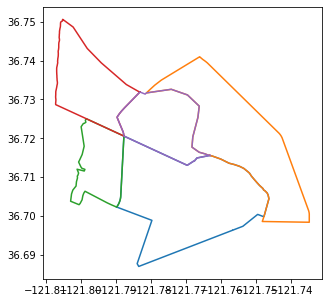

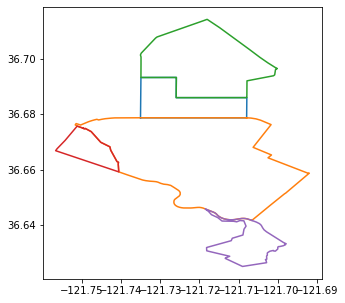

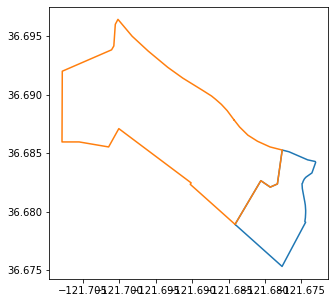

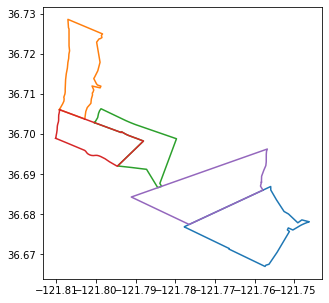

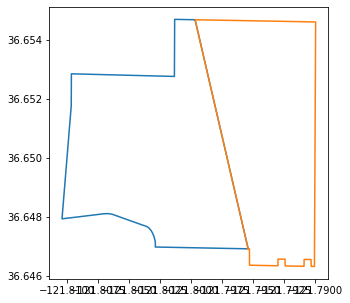

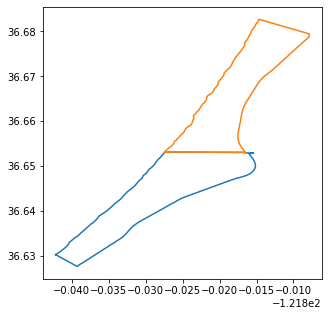

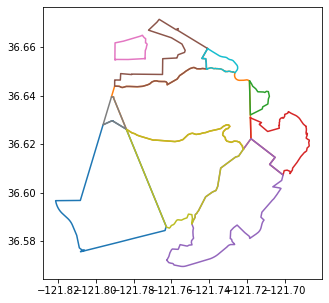

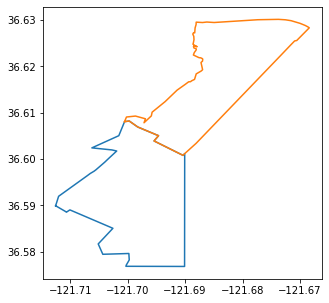

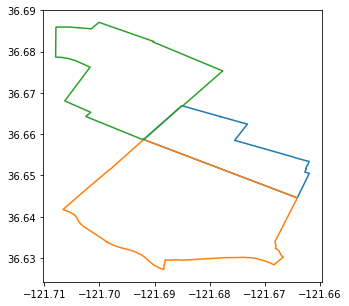

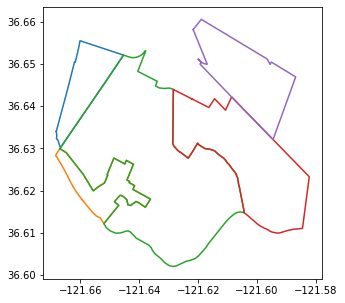

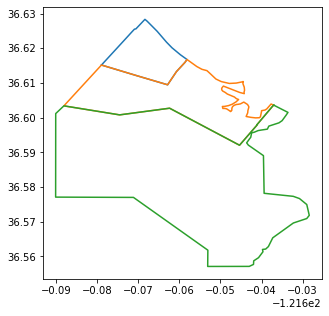

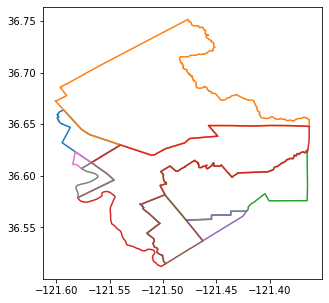

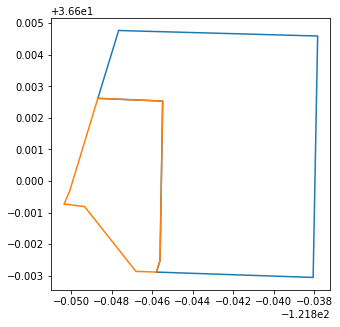

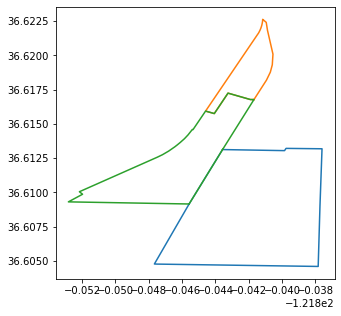

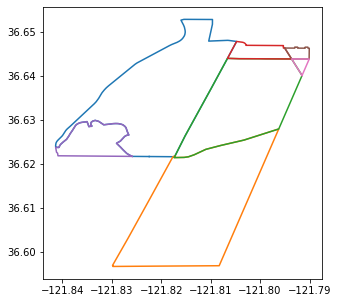

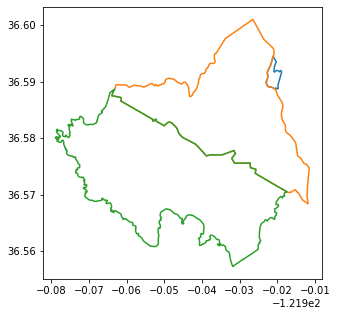

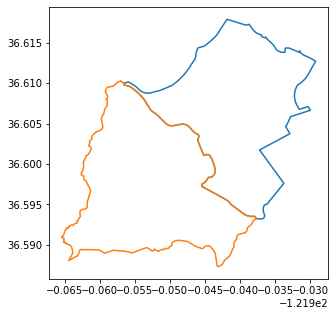

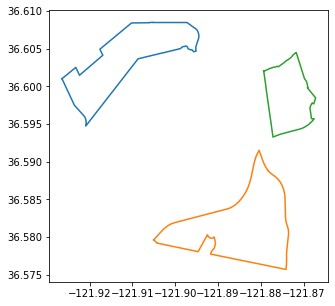

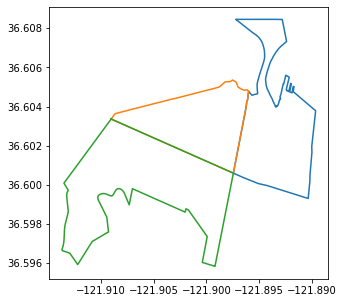

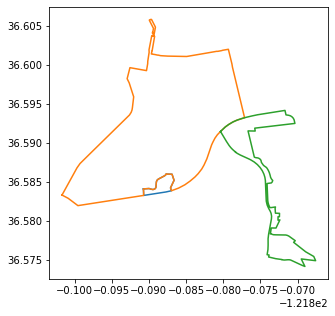

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

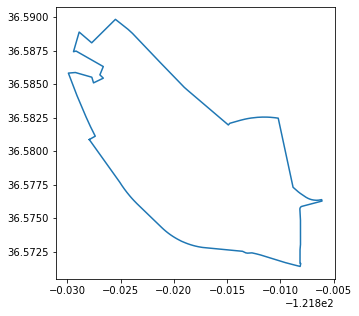

In [79]:
for elem in dups.pct16.unique()[6:]:
    # starting at index 6 because can't handle multipolygons 
    #(also we could just put an exception on multipolygons
    #but we just want to have a rough idea on what is going on)
    dup = dups[dups['pct16'] == elem]
    plt.figure(figsize = (5,5))
    for index, row in dup.iterrows():
        #print(row['geometry'])
        plt.plot(*row['geometry'].exterior.xy)
    plt.show()

So it seems some repeated precincts are actually split precincts that would be "easy" to handle : either reindex them to consider them as separate precincts or merge them. 
For non-contiguous precincts, it's hard to say whether they actually look like this, or if this is an error. 
One way to double check this is to look at how they are handled in the voting precincts data: Do they appear multiple times ? 
We can also think of using population data - but that seems like it will be a huge amount of work - . 

## Voting data precincts

In [11]:
votes_res.pct16.nunique()

24626

In [103]:
precincts.pct16.nunique()

24554

In [102]:
len(votes_res[['pct16']].merge(precincts[['pct16']].drop_duplicates(keep = 'first'), how = 'inner', on = 'pct16'))

24442

296 precincts are not shared by both files... (at least in the pct16 code) We need to check later if there are some areas that are not covered by one or the other file, or if this mismatch is simply in "encoding" of the precincts. 
But first, let's focus on the repeated precincts in the shapefiles, and see how they appear in the voting data. 


In [117]:
merged = votes_res.merge(dups, on = 'pct16' )

In [122]:
len(votes_res), votes_res.pct16.nunique()

(24626, 24626)

There are no duplicates in the voting results... So it seems that we should first fix the duplicates issue in the shapefiles file and keep on exploring later ! 